In [1]:
import torch
print(torch.cuda.is_available())		 # 查看GPu设备是否可用
print(torch.cuda.device_count()) 		 # 查看GPu设备数量
print(torch.cuda.get_device_name())   	 # 查看当前GPu设备名称，默认设备id从0开始
print(torch.cuda.current_device())

True
1
NVIDIA RTX PRO 6000 Blackwell Max-Q Workstation Edition
0


In [2]:

import os
import random
import numpy as np
import torch
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
from utils.tools import dotdict
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

args = dotdict()
args.root_path = './dataset/ETT-small/'
args.data_path ='ETTh1.csv' 
args.model_id='ETTh1_672_96'
args.model = 'AutoTimes_Llama'
args.data = 'ETTh1'
args.features = 'M'
args.seq_len = 672
args.label_len = 576
args.token_len = 96
args.test_seq_len = 672
args.test_label_len = 576
args.test_pred_len = 96
args.batch_size = 256
args.learning_rate = 0.0005
args.mlp_hidden_layers = 0
args.train_epochs = 10
args.use_amp = True
args.cosine = True
args.tmax = 10
args.mix_embeds = True
args.drop_last = True
args.checkpoints = './checkpoints/'
args.val_set_shuffle = True
args.seasonal_patterns = 'Monthly'
args.dropout = 0.1
args.llm_ckp_dir = '/largessd/home/muntasir/Desktop/AutoTimes/.models/llama-3.1-8b'
args.mlp_hidden_dim = 256
args.mlp_activation = 'tanh'
args.num_workers = 10
args.patience = 3
args.des = 'test'
args.loss = 'MSE'
args.lradj = 'type1'
args.weight_decay = 0
args.test_dir = './test'
args.test_file_name = 'checkpoint.pth'
args.gpu = 0
args.visualize = True
print('Args in experiment:')
print(args)

Args in experiment:
{'root_path': './dataset/ETT-small/', 'data_path': 'ETTh1.csv', 'model_id': 'ETTh1_672_96', 'model': 'AutoTimes_Llama', 'data': 'ETTh1', 'features': 'M', 'seq_len': 672, 'label_len': 576, 'token_len': 96, 'test_seq_len': 672, 'test_label_len': 576, 'test_pred_len': 96, 'batch_size': 256, 'learning_rate': 0.0005, 'mlp_hidden_layers': 0, 'train_epochs': 10, 'use_amp': True, 'cosine': True, 'tmax': 10, 'mix_embeds': True, 'drop_last': True, 'checkpoints': './checkpoints/', 'val_set_shuffle': True, 'seasonal_patterns': 'Monthly', 'dropout': 0.1, 'llm_ckp_dir': '/largessd/home/muntasir/Desktop/AutoTimes/.models/llama-3.1-8b', 'mlp_hidden_dim': 256, 'mlp_activation': 'tanh', 'num_workers': 10, 'patience': 3, 'des': 'test', 'loss': 'MSE', 'lradj': 'type1', 'weight_decay': 0, 'test_dir': './test', 'test_file_name': 'checkpoint.pth', 'gpu': 0, 'visualize': True}


In [3]:

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
exp = Exp_Long_Term_Forecast(args)
# setting record of experiments
setting = '{}_{}_{}_sl{}_ll{}_tl{}_lr{}_bt{}_wd{}_hd{}_hl{}_cos{}_mix{}_{}'.format(
    args.model_id,
    args.model,
    args.data,
    args.seq_len,
    args.label_len,
    args.token_len,
    args.learning_rate,
    args.batch_size,
    args.weight_decay,
    args.mlp_hidden_dim,
    args.mlp_hidden_layers,
    args.cosine,
    args.mix_embeds,
    args.des)
print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
exp.train(setting)
print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
exp.test(setting)
torch.cuda.empty_cache()

`torch_dtype` is deprecated! Use `dtype` instead!


cuda:0


Loading checkpoint shards: 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]


use linear as tokenizer and detokenizer
>>>>>>>start training : ETTh1_672_96_AutoTimes_Llama_ETTh1_sl672_ll576_tl96_lr0.0005_bt256_wd0_hd256_hl0_cosTrue_mixTrue_test>>>>>>>>>>>>>>>>>>>>>>>>>>
train 55111
val 19495
test 19495
add_scale torch.float32 torch.Size([])
encoder.weight torch.float32 torch.Size([4096, 96])
encoder.bias torch.float32 torch.Size([4096])
decoder.weight torch.float32 torch.Size([96, 4096])
decoder.bias torch.float32 torch.Size([96])
next learning rate is 0.0005
	iters: 100, epoch: 1 | loss: 0.3677862
	speed: 0.6383s/iter; left time: 1309.2280s
	iters: 200, epoch: 1 | loss: 0.3500991
	speed: 0.6355s/iter; left time: 1239.8728s
Epoch: 1 cost time: 137.26742959022522
Epoch: 1, Steps: 215 | Train Loss: 0.4132673 Vali Loss: 0.6336497 Test Loss: 0.4175568
Validation loss decreased (inf --> 0.633650).
lr = 0.0004877644
	iters: 100, epoch: 2 | loss: 0.3462474
	speed: 0.9982s/iter; left time: 1832.7302s
	iters: 200, epoch: 2 | loss: 0.3575424
	speed: 0.6342s/iter; left time

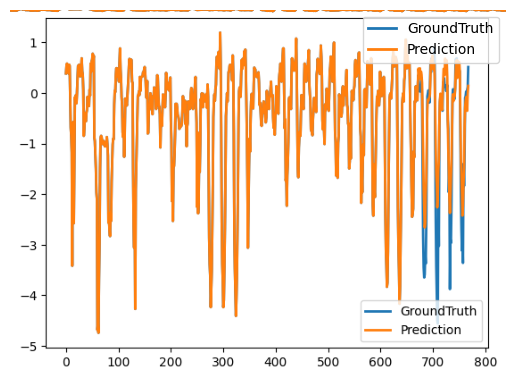

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
img = Image.open('test_results/ETTh1_672_96_AutoTimes_Llama_ETTh1_sl672_ll576_tl96_lr0.0005_bt256_wd0_hd256_hl0_cosTrue_mixTrue_test/96/0.png')
# 使用matplotlib显示图片
plt.imshow(img)
plt.axis('off') 
plt.show()